In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)

In [8]:
housing = pd.read_csv('./data/housing.csv')

In [9]:
X = housing.drop(columns='median_house_value')
y = housing.median_house_value.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling

* Features haben unterschiedliche Wertebereiche
  population: [0, 35000] vs median_income: [0, 15]
![scaling](./assets/scaling.png)
* Feature scaling bringt alle Features zusammen
* *Normalization* x -> [0, 1] $$x' = \frac{x-x_{min}}{x_{max} - x_{min}}$$
* *Standardization* x -> Standardnormalverteilt  $$x' = \frac{x-\mu}{\sigma}$$

Wichtig bei
* Algorithmen, die mit Distanzen arbeiten (SVM, ...)
* ANNs

In [10]:
transformer = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='mean'), ['total_bedrooms']),
    ('one_hot', OneHotEncoder(), ['ocean_proximity']),
], remainder='passthrough')

pipeline = Pipeline([
    ('column_transformer', transformer),
    ('scaler', RobustScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [11]:
X_train

array([[ 0.54246966,  0.        ,  0.        , ...,  1.20917823,
         0.65337423, -0.12970915],
       [ 0.99928622,  0.        ,  0.        , ...,  0.15688367,
         1.06134969,  0.12087153],
       [-0.30264097,  0.        ,  0.        , ..., -0.26894344,
        -0.22699387,  0.27668566],
       ...,
       [ 0.37687366,  1.        ,  0.        , ...,  0.62860192,
         0.35889571, -0.27709355],
       [ 0.45681656,  1.        ,  0.        , ...,  0.65101387,
         0.45705521,  0.98501003],
       [ 2.50678087,  0.        ,  0.        , ...,  1.54962647,
         2.55214724, -0.43975119]])

## Biologisches Neuron

![Biological neuron](https://ib.bioninja.com.au/_Media/neuron_med.jpeg)

* Inputs in Form von elektrischen Signalen
* Input kommt über Dendriten
* Falls Summe der Inputs Schwelle(*Aktivierungspotential*) überschreitet, wird Signal weitergeleitet

## Künstliches Neuron(*Perceptron*)

![Artificial neuron](https://www.theprojectspot.com/images/post-assets/an.jpg)

* Inputs (x_i) sind die Features einer Observation
* Die Inputs werden verschieden gewichtet (w_i)
* Lernen => Gewichte adaptieren
* $$ output = f(\sum_i x_iw_i) = f(\vec{x}\vec{w}^T) $$

In [6]:
perceptron = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(units=1)
])

perceptron.build()

In [7]:
perceptron.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[ 0.02954841],
        [-0.39012253],
        [-0.3231217 ],
        [-0.53210354],
        [-0.4805643 ],
        [ 0.4922253 ],
        [ 0.24728352],
        [-0.43861786],
        [ 0.23310316],
        [ 0.05873382],
        [ 0.5165386 ],
        [ 0.55541384],
        [-0.01847494]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

### Training

* optimizer: wie wird auf Fehler reagiert
* loss: wie wird Fehler gemessen
* batch_size: observations, welche analysiert werden zwischen 2 weight-Anpassungen
* epochs: wie oft alle Trainingsdaten analysiert werden

In [14]:
perceptron.compile(optimizer='adam', loss='mse')

history = perceptron.fit(X_train, y_train,
                         validation_data=(X_test, y_test),
                         batch_size=32,
                         epochs=5,
                         verbose=1)

Epoch 1/5
516/516 [==============================] - 1s 2ms/step - loss: 56292810752.0000 - val_loss: 55329558528.0000
Epoch 2/5
516/516 [==============================] - 1s 2ms/step - loss: 56291979264.0000 - val_loss: 55328755712.0000
Epoch 3/5
516/516 [==============================] - 1s 2ms/step - loss: 56291110912.0000 - val_loss: 55327916032.0000
Epoch 4/5
516/516 [==============================] - 1s 2ms/step - loss: 56290246656.0000 - val_loss: 55327076352.0000
Epoch 5/5
516/516 [==============================] - 1s 2ms/step - loss: 56289386496.0000 - val_loss: 55326253056.0000


In [9]:
perceptron.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[ 2.0798633 ],
        [ 2.1240993 ],
        [ 2.1354642 ],
        [-0.3181002 ],
        [ 1.7825285 ],
        [ 2.792777  ],
        [-2.170155  ],
        [ 2.0142806 ],
        [ 0.54940933],
        [ 2.1575644 ],
        [ 2.4326842 ],
        [ 2.6088986 ],
        [ 2.2433593 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([2.568418], dtype=float32)>]

<Axes: >

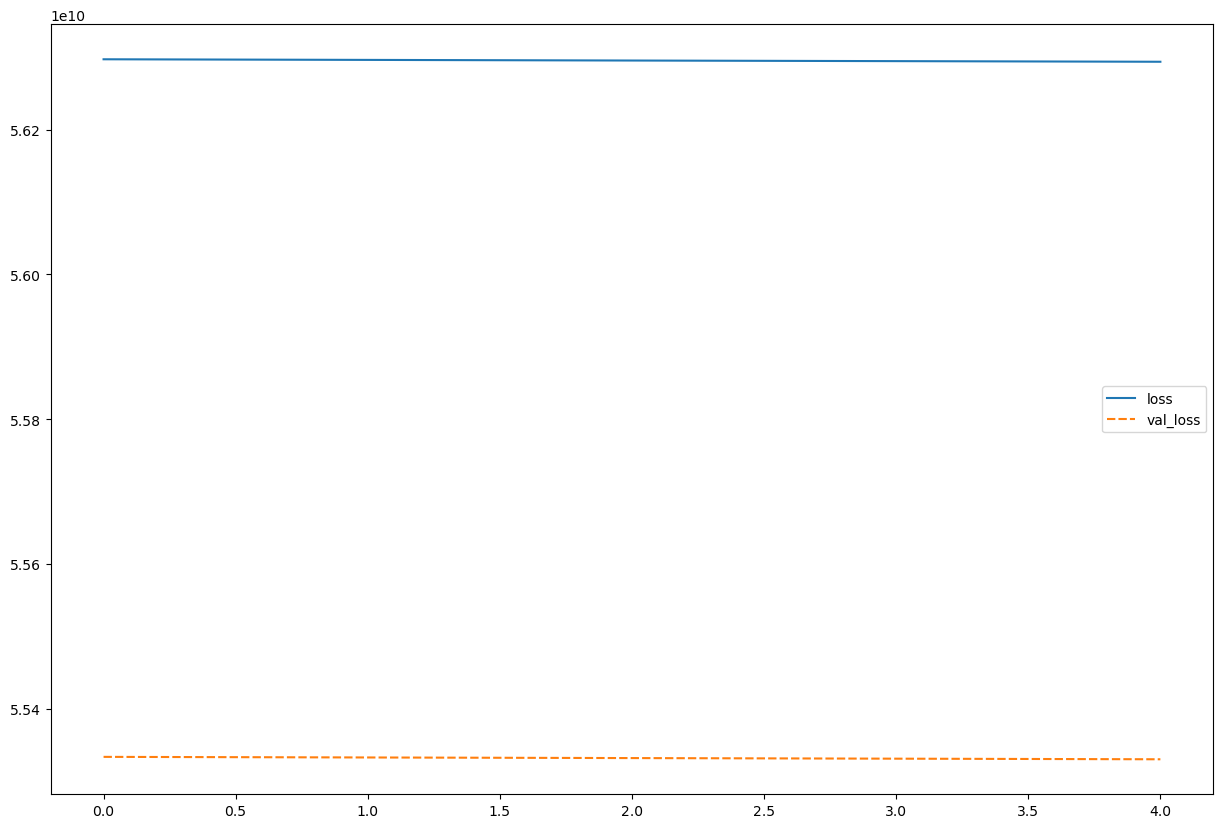

In [10]:
sns.lineplot(data=history.history)

## Mehr Neuronen!

In [11]:
ann = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(units=64),
    Dense(units=64),
    Dense(units=1)
])

Epoch 1/15
516/516 [==============================] - 1s 2ms/step - loss: 54726836224.0000 - val_loss: 49338253312.0000
Epoch 2/15
516/516 [==============================] - 1s 2ms/step - loss: 40192434176.0000 - val_loss: 29685084160.0000
Epoch 3/15
516/516 [==============================] - 1s 2ms/step - loss: 21768302592.0000 - val_loss: 15066696704.0000
Epoch 4/15
516/516 [==============================] - 1s 2ms/step - loss: 11409597440.0000 - val_loss: 8632168448.0000
Epoch 5/15
516/516 [==============================] - 1s 2ms/step - loss: 7206655488.0000 - val_loss: 6390565888.0000
Epoch 6/15
516/516 [==============================] - 1s 2ms/step - loss: 5838415872.0000 - val_loss: 5709757952.0000
Epoch 7/15
516/516 [==============================] - 1s 2ms/step - loss: 5386244608.0000 - val_loss: 5435445760.0000
Epoch 8/15
516/516 [==============================] - 1s 1ms/step - loss: 5185250304.0000 - val_loss: 5291301888.0000
Epoch 9/15
516/516 [=============================

<Axes: >

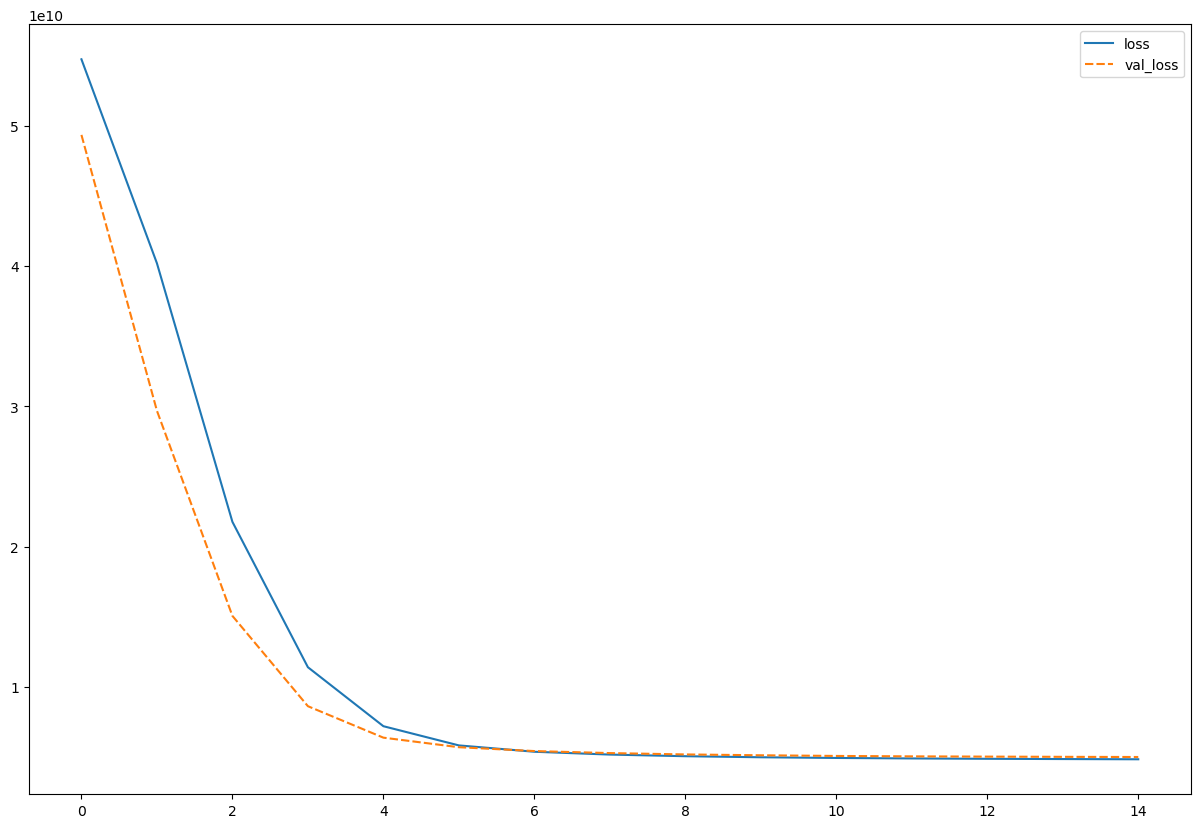

In [12]:
ann.compile(optimizer='adam', loss='mse')

history = ann.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  batch_size=32,
                  epochs=15)

sns.lineplot(data=history.history)

In [13]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=ann.predict(X_test)))

129/129 [==============================] - 0s 1ms/step


70797.66630150378